<a href="https://colab.research.google.com/github/varun-sirpal10/convolutional-NN/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

In [0]:
from google.colab import files

In [0]:
uploaded = files.upload()

Saving fashion-mnist.csv to fashion-mnist.csv


In [0]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "fashion-mnist.csv" with length 22176691 bytes


In [0]:
import io

In [0]:
x = pd.read_csv(io.StringIO(uploaded['fashion-mnist.csv'].decode('utf-8')))

In [0]:
X_ = np.array(x)
X = X_[:,1:]
X = X/255.0
Y = X_[:,0]
print(X.shape,Y.shape)

(10000, 784) (10000,)


In [0]:
np.unique(Y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

In [0]:
X_train = X.reshape(-1,28,28,1)
Y_train = np_utils.to_categorical(Y)

print(X_train.shape,Y_train.shape)

(10000, 28, 28, 1) (10000, 10)


In [0]:
import matplotlib.pyplot as plt

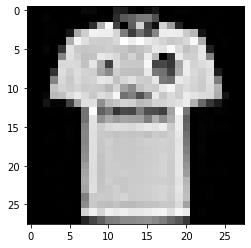

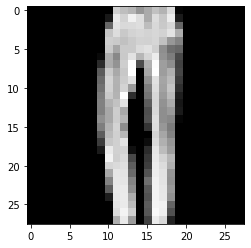

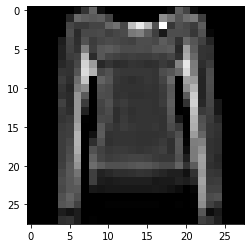

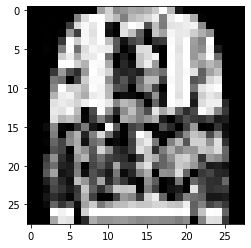

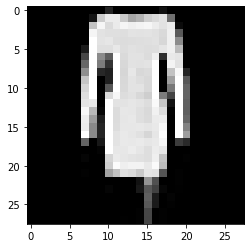

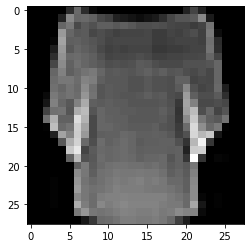

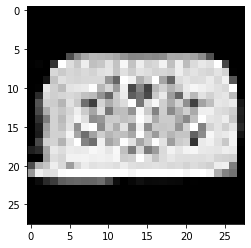

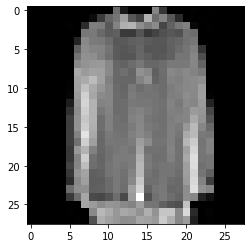

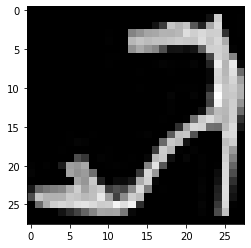

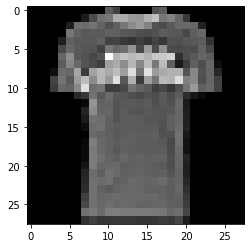

In [0]:
for i in range(10):
  plt.imshow(X_train[i].reshape(28,28),cmap="gray")
  plt.show()

## CNN Model

In [0]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])

In [0]:
hist = model.fit(X_train,Y_train,shuffle=True,epochs=20,validation_split=0.20,batch_size=256)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 8000 samples, validate on 2000 samples
Epoch 1/20





8000/8000 [==============================] - 31s 4ms/step - loss: 1.7648 - acc: 0.3615 - val_loss: 1.1039 - val_acc: 0.6525
Epoch 2/20
8000/8000 [==============================] - 29s 4ms/step - loss: 0.8478 - acc: 0.7044 - val_loss: 0.7868 - val_acc: 0.7220
Epoch 3/20
8000/8000 [==============================] - 30s 4ms/step - loss: 0.6741 - acc: 0.7579 - val_loss: 0.6963 - val_acc: 0.7560
Epoch 4/20
8000/8000 [==============================] - 29s 4ms/step - loss: 0.6253 - acc: 0.7735 - val_loss: 0.6170 - val_acc: 0.7845
Epoch 5/20
8000/8000 [==============================] - 29s 4ms/step - loss: 0.5617 - acc: 0.7984 - val_loss: 0.5618 - val_acc: 0.8035
Epoch 6/20
8000/8000 [==============================] - 30s 4ms/step - loss: 0.5172 - acc: 0.8162 - val_loss: 0.5382 - val_acc: 0.8065
Epoch 7/20
8000/8000 [==================

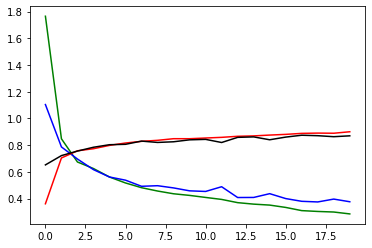

In [0]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['val_acc'],'black')
plt.show()